<a href="https://colab.research.google.com/github/AliS1920/arbol_decision_especies/blob/main/Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Talller Árbol de Decisón.**

*   Steven Robles
*   Alisson García
*   Alejandro Martínez


## **Carga de Datos**

In [ ]:
## Instalar de ser necesario  herramienta de vizualización de árbol de decisión
#!pip install graphviz

In [ ]:
## Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Procesamiento de datos
import numpy as np
import pandas as pd
## Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/palmer-archipelago-antarctica-penguin-data


In [ ]:
import os
import pandas as pd

# Ver qué archivos hay en la carpeta descargada
print("Archivos en la carpeta:")
print(os.listdir(path))

# Cargar el dataset principal (penguins_size.csv)
df = pd.read_csv(os.path.join(path, "penguins_size.csv"))

print("Dimensiones del dataset:", df.shape)
print(df.head())


Archivos en la carpeta:
['penguins_size.csv', 'penguins_lter.csv']
Dimensiones del dataset: (344, 7)
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Exploración básica

In [ ]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       152     168               NaN              NaN                NaN   
mean  

/tmp/ipython-input-2770746005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=df, palette="Set2")


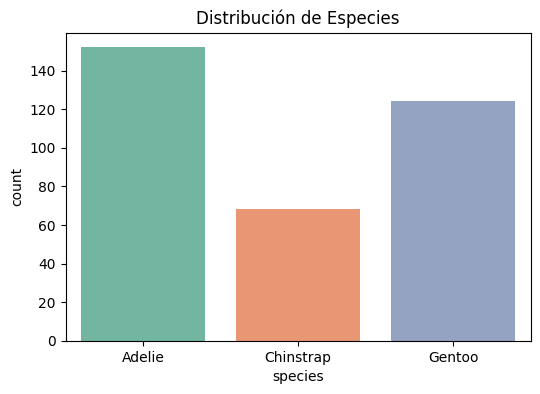

In [ ]:
# Distribución de especies
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df, palette="Set2")
plt.title("Distribución de Especies")
plt.show()

In [ ]:
# Ver cuántos valores nulos hay en sex
print(df['sex'].value_counts(dropna=False))
# reemplazar los nulos por "UNKNOWN"
df['sex'] = df['sex'].fillna("UNKNOWN")

sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


/tmp/ipython-input-3516436989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="Set1")


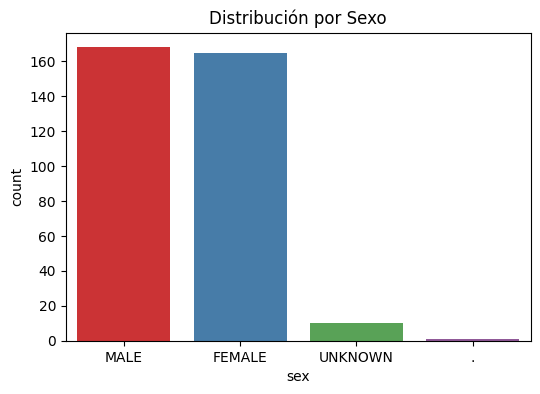

In [ ]:
# Distribución de sexos
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=df, palette="Set1")
plt.title("Distribución por Sexo")
plt.show()

/tmp/ipython-input-51646956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="island", data=df, palette="Set3")


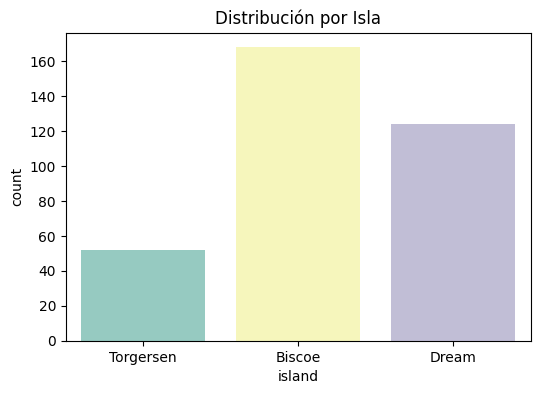

In [ ]:
# Distribución por isla
plt.figure(figsize=(6,4))
sns.countplot(x="island", data=df, palette="Set3")
plt.title("Distribución por Isla")
plt.show()

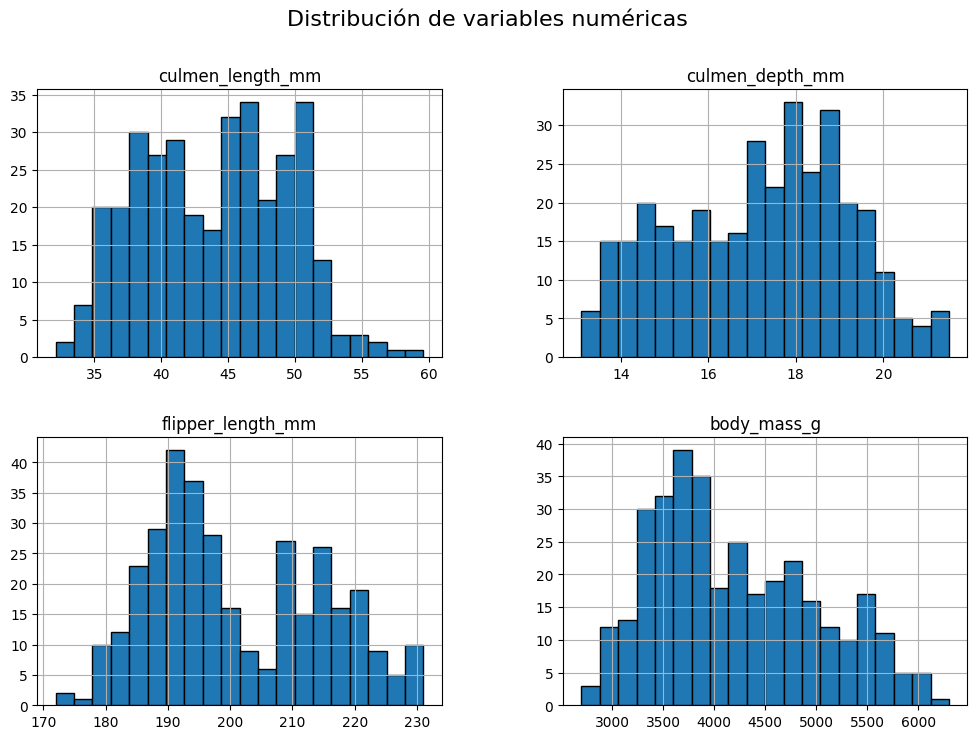

In [ ]:
# Histogramas de variables numéricas
df.hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

/tmp/ipython-input-2853003406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="culmen_length_mm", data=df, palette="Set2")


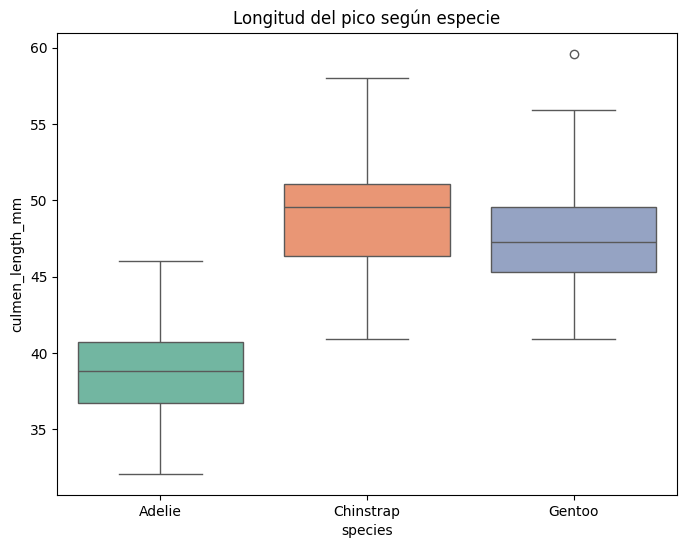

/tmp/ipython-input-2853003406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="flipper_length_mm", data=df, palette="Set2")


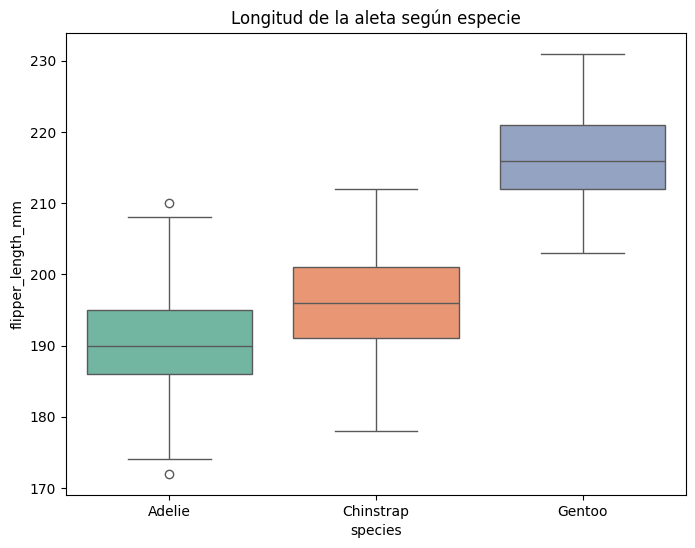

In [ ]:
# Boxplot para comparar medidas entre especies
plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="culmen_length_mm", data=df, palette="Set2")
plt.title("Longitud del pico según especie")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="species", y="flipper_length_mm", data=df, palette="Set2")
plt.title("Longitud de la aleta según especie")
plt.show()

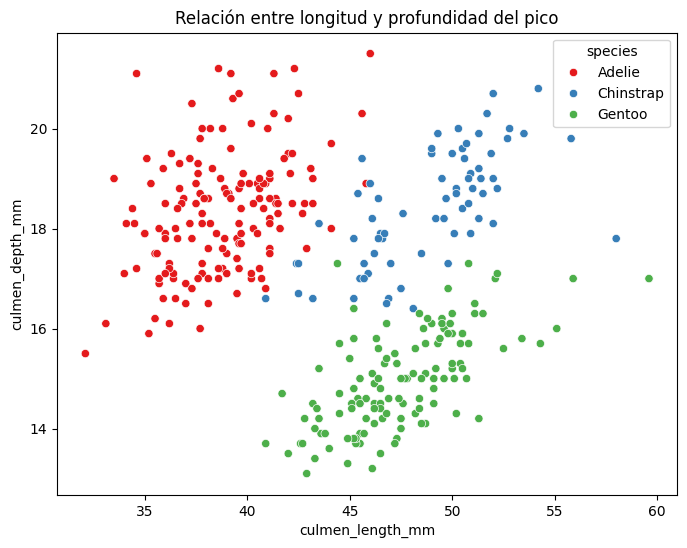

In [ ]:
# Relación entre dos variables
plt.figure(figsize=(8,6))
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", hue="species", data=df, palette="Set1")
plt.title("Relación entre longitud y profundidad del pico")
plt.show()

### **Preprocesamiento**

In [ ]:
# Eliminamos filas con valores nulos
df = df.dropna()

# Codificamos variables categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['species'] = le.fit_transform(df['species'])
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])

### **Variables Predictoras y Target**

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

# División en train, val y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### **Entrenamiento del modelo**

In [ ]:
# ---------------------------------------------
# Definición del modelo de Árbol de Decisión
# Parámetros más relevantes:
# - criterion="gini": mide la impureza de los nodos.
# - max_depth=3: limita la profundidad máxima del árbol para evitar sobreajuste.
# - random_state=42: asegura que los resultados sean reproducibles.
# - min_samples_split: número mínimo de muestras necesarias para dividir un nodo (por defecto=2).
# - min_samples_leaf: número mínimo de muestras en una hoja (por defecto=1).
# ---------------------------------------------
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### **Evaluación**

In [ ]:
print("Precisión en entrenamiento:", clf.score(X_train, y_train))
print("Precisión en validación:", clf.score(X_val, y_val))
print("Precisión en prueba:", clf.score(X_test, y_test))

Precisión en entrenamiento: 0.9916317991631799
Precisión en validación: 0.9215686274509803
Precisión en prueba: 0.9807692307692307


### **Visualización del Árbol**

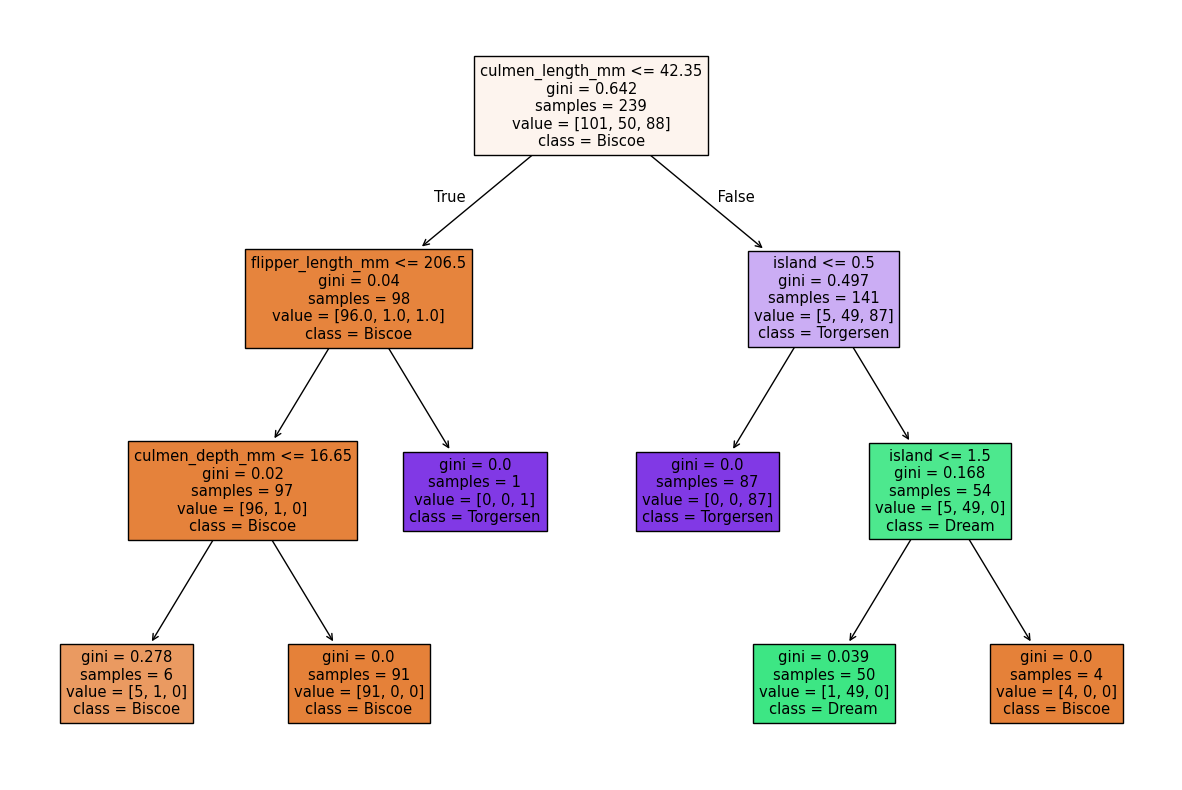

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=le.classes_,
               filled=True)
plt.show()


El primer nodo del árbol tiene la primera pregunta clave, en este caso si la longitud del pico (bill_length_mm) es menor o igual a cierto valor. A partir de esta respuesta se divide el nodo en dos ramas que permiten separar las especies de pingüinos.

La métrica “gini” es un indicador de la pureza del nodo, es decir si puede pertenecer a más de una clase. Si el valor de gini es 0, indica que pertenece a una única clase, mientras que un valor positivo indica que el nodo aún contiene ejemplos de más de una especie.

En este primer nivel se tienen todas las muestras del conjunto de entrenamiento, y este valor se va dividiendo en cada rama de acuerdo con las condiciones establecidas en el nodo.

El valor indicado en cada nodo muestra cuántos ejemplos pertenecen a cada categoría (especies de pingüinos). La clase mostrada indica cuál sería la clase elegida como resultado si ese fuera un nodo final; es decir, para los ejemplos que lleguen allí, se asignaría esa especie como predicción.

Este análisis de resultados de cada nodo es equivalente en todo el árbol. En los niveles finales se encuentran nodos con un valor de gini = 0.0, lo que indica que se alcanzó un nodo puro y por lo tanto se asigna una sola clase como predicción.

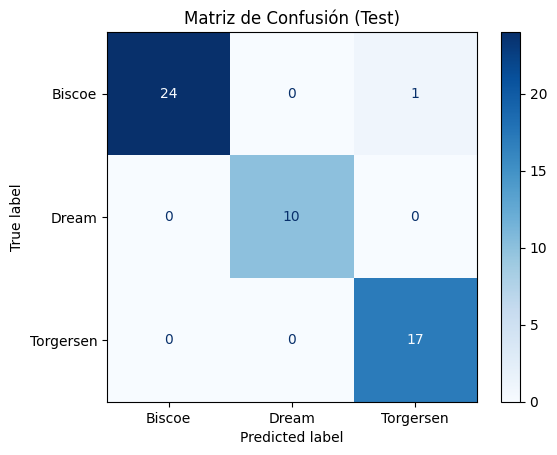

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(clf.classes_))

disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión (Test)")
plt.show()


In [ ]:
class_names = le.inverse_transform(clf.classes_)

# Imprimir reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=class_names))

#(Support indica cuántas muestras de cada clase había en el conjunto de prueba)#

Reporte de Clasificación:
              precision    recall  f1-score   support

      Biscoe       1.00      0.96      0.98        25
       Dream       1.00      1.00      1.00        10
   Torgersen       0.94      1.00      0.97        17

    accuracy                           0.98        52
   macro avg       0.98      0.99      0.98        52
weighted avg       0.98      0.98      0.98        52



El árbol de decisión tiene un rendimiento muy alto (98%) y generaliza bien. El principal punto de mejora está en la confusión entre Biscoe y Torgersen, lo cual puede deberse a que esas especies tienen características físicas muy similares en la base de datos por ejemplo, longitud del pico y posiblemente se encuentren algunos individuos en la misma isla, por lo tanto, son similares para el modelo. Clasifica con muy alta precisión las tres especies, entre 97% y 100% de f1-score. Tiene un sesgo mínimo en la confusión entre Biscoe y Torgersen.

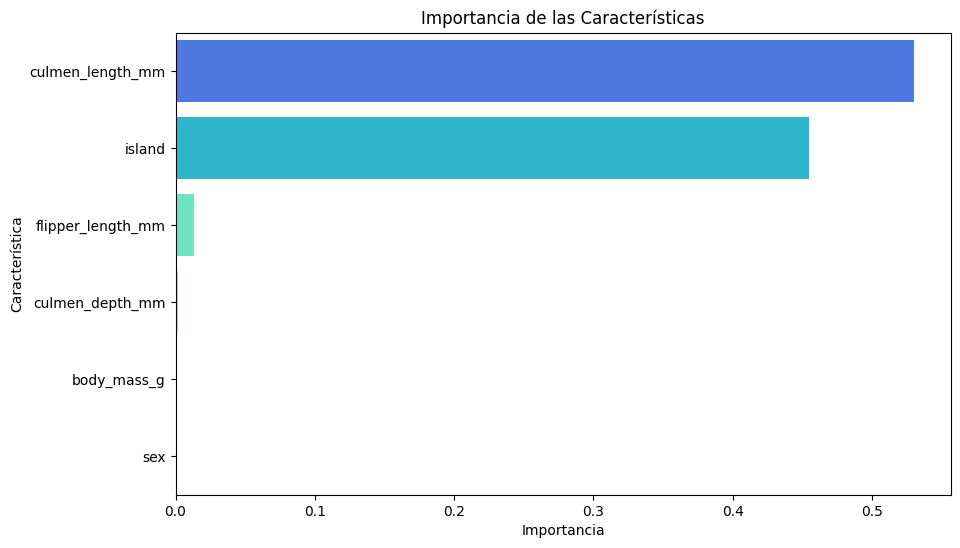

In [ ]:
#Importancia de cada característica
importances = clf.feature_importances_

# Dataframe
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Graficar importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='rainbow', hue='feature', legend=False)
plt.ylabel('Característica')
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()

El árbol de decisión se apoya casi exclusivamente en dos características: la longitud del pico y la isla.Por lo tanto, podemos decir que algunas especies son más frecuentes en ciertas islas, siendo una rasgo caracteristico de cada especie
El tamaño del pico también es un rasgo distintivo entre especies.
El resto de características (peso, sexo, profundidad del pico) no aportaron información útil al modelo, posiblemente porque están correlacionadas o no son discriminantes para separar las especies.